In [163]:
# Plot in map

from typing import List

import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point


def plot_in_world(lat: List[float], lon: List[float]):
    df = pd.DataFrame({"lat": lon[:], "lon": lat[:]})
    geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
    gdf: GeoDataFrame = GeoDataFrame(df, geometry=geometry)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=1)
    plt.show()

### SisPI data

In [164]:
from netCDF4 import Dataset
from pathlib import Path
import pandas as pd
import numpy as np

In [165]:
path = Path.joinpath(Path.cwd(), "data", "SisPI", "d03")
files = [f for f in path.iterdir()]

print(len(files))

24


In [166]:
initial = Dataset(files[0])  # check before that all files have the same dimensions

for d in initial.dimensions.items():
    print(d)

('Time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 1)
('DateStrLen', <class 'netCDF4._netCDF4.Dimension'>: name = 'DateStrLen', size = 19)
('west_east', <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east', size = 411)
('south_north', <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north', size = 183)
('bottom_top', <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top', size = 27)
('bottom_top_stag', <class 'netCDF4._netCDF4.Dimension'>: name = 'bottom_top_stag', size = 28)
('soil_layers_stag', <class 'netCDF4._netCDF4.Dimension'>: name = 'soil_layers_stag', size = 4)
('west_east_stag', <class 'netCDF4._netCDF4.Dimension'>: name = 'west_east_stag', size = 412)
('south_north_stag', <class 'netCDF4._netCDF4.Dimension'>: name = 'south_north_stag', size = 184)


In [167]:
initial.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QNICE', 'QNSNOW', 'QNRAIN', 'QNGRAUPEL', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'QKE', 'VAR', 'TKE_PBL', 'EL_PBL', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P0

In [168]:
time = initial['Times']
_date: str = ''.join([a.decode('UTF-8') for a in time[0][:]])

_date

'2021-07-06_19:00:00'

In [169]:
sispi_lat = np.array(initial['XLAT'][:]).flatten()
sispi_lon = np.array(initial['XLONG'][:]).flatten()
sispi_precipitations = np.array(initial['RAINC'][:]).flatten()

len(sispi_lat), len(sispi_lon), len(sispi_precipitations)

(75213, 75213, 75213)

(-85.71704, -73.765396) (19.340546, 24.264412)


<AxesSubplot:xlabel='lon', ylabel='lat'>

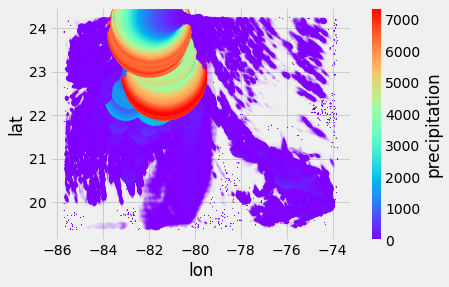

In [170]:
amount_precipitations = np.array([0.] * len(sispi_lat))

for f in files:
    ds = Dataset(f)

    p1 = np.array(ds['RAINC'][:]).flatten().clip(0)
    p2 = np.array(ds['RAINNC'][:]).flatten().clip(0)

    amount_precipitations += p1 + p2

dataset_sispi = pd.DataFrame({"lon": sispi_lon, "lat": sispi_lat, "precipitation": amount_precipitations})
dataset_sispi.columns = ["lon", "lat", "precipitation"]

filter = dataset_sispi["precipitation"] > 0

interval_lat = (np.min(sispi_lat), np.max(sispi_lat))
interval_lon = (np.min(sispi_lon), np.max(sispi_lon))

print(interval_lon, interval_lat)

dataset_sispi[filter].plot(kind="scatter", x="lon", y="lat", s=dataset_sispi[filter]["precipitation"],
                           c="precipitation", cmap="rainbow")

In [171]:
dataset_sispi

,lon,lat,precipitation
0,-85.717041,19.340546,0.0
1,-85.687889,19.340546,0.0
2,-85.658745,19.340546,0.0
3,-85.629593,19.340546,0.0
4,-85.600441,19.340546,0.0
...,...,...,...
75208,-73.881996,24.264412,0.0
75209,-73.852844,24.264412,0.0
75210,-73.823692,24.264412,0.0
75211,-73.794548,24.264412,0.0


### GPM data

In [172]:
import h5py
import numpy as np
import pandas as pd

In [173]:
dataset_gpm = h5py.File('data.hdf5', 'r')

grid = dataset_gpm['Grid']
grid.keys()

<KeysViewHDF5 ['nv', 'lonv', 'latv', 'time', 'lon', 'lat', 'time_bnds', 'lon_bnds', 'lat_bnds', 'precipitationCal', 'precipitationUncal', 'randomError', 'HQprecipitation', 'HQprecipSource', 'HQobservationTime', 'IRprecipitation', 'IRkalmanFilterWeight', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']>

In [174]:
print("Longitude data: {}".format(grid['lon']))
print("Longitude data attributes: {}".format(list(grid['lon'].attrs)))

Longitude data: <HDF5 dataset "lon": shape (3600,), type "<f4">
Longitude data attributes: ['DimensionNames', 'Units', 'units', 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']


In [175]:
print("Name: {}".format(grid['lon'].attrs['standard_name'].decode()))
print("Unit: {}".format(grid['lon'].attrs['units'].decode()))

Name: longitude
Unit: degrees_east


In [176]:
print("Latitude data: {}".format(grid['lat']))
print("Latitude data attributes: {}".format(list(grid['lat'].attrs)))

Latitude data: <HDF5 dataset "lat": shape (1800,), type "<f4">
Latitude data attributes: ['DimensionNames', 'Units', 'units', 'standard_name', 'LongName', 'bounds', 'axis', 'CLASS', 'REFERENCE_LIST']


In [177]:
print("Name: {}".format(grid['lat'].attrs['standard_name'].decode()))
print("Unit: {}".format(grid['lat'].attrs['units'].decode()))

Name: latitude
Unit: degrees_north


In [178]:
print("Precipitation data: {}".format(grid['precipitationCal']))
print("Precipitation data attributes: {}".format(list(grid['precipitationCal'].attrs)))
print("Unit: {}".format(grid['precipitationCal'].attrs['units'].decode()))

Precipitation data: <HDF5 dataset "precipitationCal": shape (1, 3600, 1800), type "<f4">
Precipitation data attributes: ['DimensionNames', 'Units', 'units', 'coordinates', '_FillValue', 'CodeMissingValue', 'DIMENSION_LIST']
Unit: mm/hr


In [179]:
lon_values_gpm = np.repeat(list(grid['lon']), 1800)
lat_values_gpm = list(grid['lat']) * 3600
precipitation_values_gpm = np.array(list(grid['precipitationCal'])).flatten()

(5950, 3)


<AxesSubplot:title={'center':'GPM'}, ylabel='Frequency'>

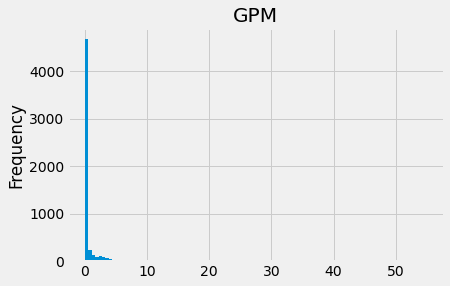

In [190]:
dataset_gpm = pd.DataFrame(
    {"lon": lon_values_gpm, "lat": lat_values_gpm, "precipitation": precipitation_values_gpm.clip(0)})

# dataset_gpm.columns = [grid['lon'].attrs['standard_name'].decode() + " (" + grid['lon'].attrs['units'].decode() + ")",
#                        grid['lat'].attrs['standard_name'].decode() + " (" + grid['lat'].attrs['units'].decode() + ")",
#                    "Precipitation (" + grid['precipitationCal'].attrs['units'].decode() + ")", ]

dataset_gpm_into_interval = dataset_gpm[
    (dataset_gpm["lon"] >= interval_lon[0]) &
    (dataset_gpm["lon"] <= interval_lon[1]) &
    (dataset_gpm["lat"] >= interval_lat[0]) &
    (dataset_gpm["lat"] <= interval_lat[1])
    ]

print(dataset_gpm_into_interval.shape)

# dataset_gpm.head()
dataset_gpm_into_interval['precipitation'].plot(kind="hist", bins=100, title="GPM")

In [181]:
dataset_gpm[:1000].to_csv("data.csv", index=False)

In [182]:
localization_sispi = np.column_stack((dataset_sispi["lon"], dataset_sispi["lat"]))  # [[], [], ...]
localization_gpm = np.column_stack((dataset_gpm_into_interval["lon"], dataset_gpm_into_interval["lat"]))

print(localization_gpm.shape)
print(localization_sispi.shape)

same = [x for x in localization_sispi if x in localization_gpm]

(5950, 2)
(75213, 2)


In [183]:
localization_gpm.sort()

localization_gpm

array([[-85.65,  19.35],
       [-85.65,  19.45],
       [-85.65,  19.55],
       ...,
       [-73.85,  24.05],
       [-73.85,  24.15],
       [-73.85,  24.25]], dtype=float32)

In [184]:
localization_sispi.sort()

localization_sispi

array([[-85.71704 ,  19.340546],
       [-85.68789 ,  19.340546],
       [-85.658745,  19.340546],
       ...,
       [-73.82369 ,  24.264412],
       [-73.79455 ,  24.264412],
       [-73.765396,  24.264412]], dtype=float32)

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

gpm_filter_greater_0 = dataset_gpm_into_interval['precipitation'] > 0
sispi_filter_greater_0 = dataset_sispi['precipitation'] > 0

gpm_lat = np.array(dataset_gpm_into_interval["lat"])
gpm_lon = np.array(dataset_gpm_into_interval["lon"])

x = np.column_stack((gpm_lon, gpm_lat))
y = np.array(dataset_gpm_into_interval["precipitation"])

In [186]:
model = LinearRegression().fit(x, y)

print(model.score(x, y))
print(model.coef_)
print(r2_score(y, model.predict(x)))

0.022521363295076258
[-0.16314453 -0.24491808]
0.022521363295076258


In [187]:
x_sispi = np.column_stack((sispi_lat, sispi_lon))

fixed_sispi_by_model = model.predict(x_sispi)

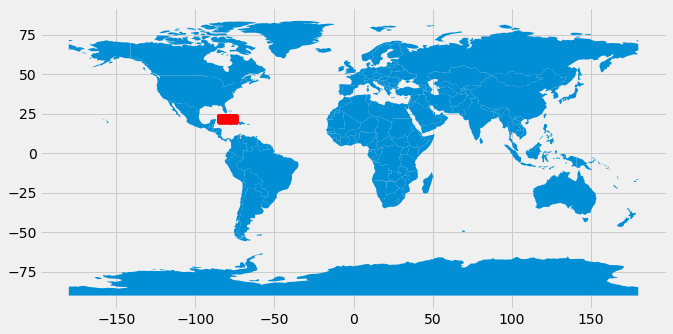

In [188]:
plot_in_world(gpm_lat, gpm_lon)

In [189]:
mean = (sispi_precipitations - fixed_sispi_by_model).sum() / len(sispi_precipitations)

mean

-9.669927406166487